# Nachbearbeitung von Binärbildern mit morphologischen Operationen

Morphologische Operationen transformieren Bilder basierend auf der Form; typischerweise sprechen wir in diesem Kontext von Binärbildern.

In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage import morphology
from skimage import filters

## Kerne, Fußabdrücke und strukturelle Elemente

Wenn wir mit scikit-image arbeiten, haben viele morphologische Filter einen `footprint`-Parameter. Dieser Fußabdruck ist der Filterkern, und in der Literatur finden Sie auch den Begriff `strukturelles Element` dafür.

In [2]:
# erstellt eine Scheibe von 1 mit Radius = 3
disk = morphology.disk(3) 
disk

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

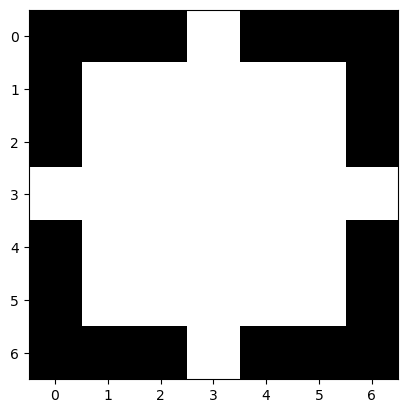

In [3]:
plt.imshow(disk, cmap='gray')

In [4]:
# erstellt ein Quadrat mit Breite und Höhe = 3
square = morphology.square(3) 
square

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

## Binäre Morphologie

Zur Demonstration der morphologischen Filterung von Binärbildern verwenden wir wieder das kleine Zellkernbild.

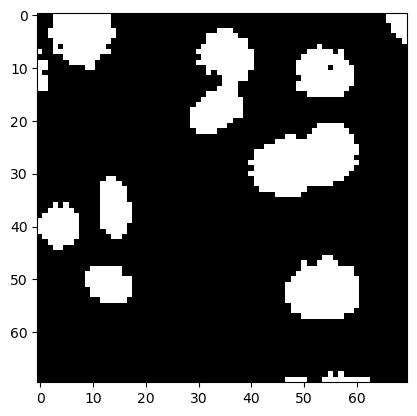

In [5]:
image_nuclei = imread('../../data/mitosis_mod.tif').astype(float)
image_binary = image_nuclei > filters.threshold_otsu(image_nuclei)

plt.imshow(image_binary, cmap='gray')

## Erosion und Dilatation
Um weiße Inseln im schwarzen Ozean zu verkleinern, müssen wir ihre Küstenlinien _erodieren_.

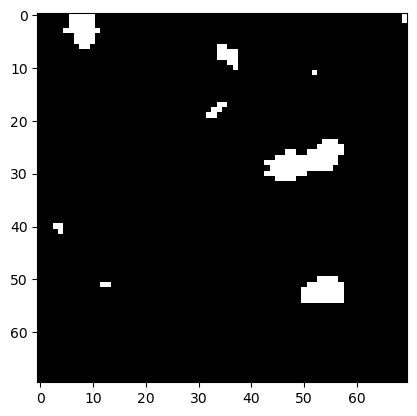

In [6]:
eroded = morphology.binary_erosion(image_binary, disk)

plt.imshow(eroded, cmap='gray')

Wenn wir das Bild anschließend dilatieren, erhalten wir weiße Inseln zurück, die glatter aussehen als im ursprünglichen Binärbild.

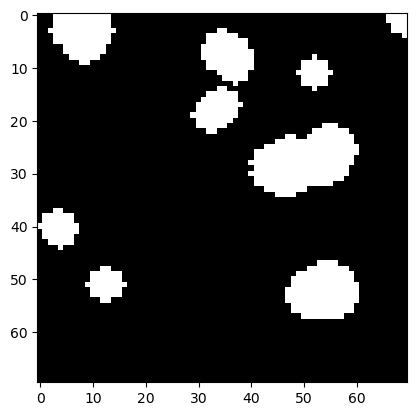

In [7]:
eroded_dilated = morphology.binary_dilation(eroded, disk)

plt.imshow(eroded_dilated, cmap='gray')

Das aufeinanderfolgende Aufrufen von Erosion und Dilatation ist so häufig, dass es dafür eine extra Funktion gibt, die genau das macht. Da sich die Lücke zwischen den Inseln _öffnet_, wird die Operation als _Öffnung_ bezeichnet.

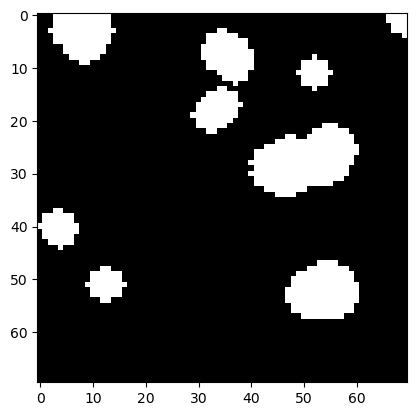

In [8]:
opened = morphology.binary_opening(image_binary, disk)

plt.imshow(opened, cmap='gray')

## Übung 1
Es gibt auch eine _Schließungs_-Operation. Wenden Sie sie auf das Binärbild an.

## Übung 2
Suchen Sie in der [scikit-image Dokumentation](https://scikit-image.org/) nach Minimum- und Maximum-Filtern. Wenden Sie den Minimum-Filter auf das Binärbild und anschließend den Maximum-Filter auf das Ergebnis an. Vergleichen Sie es mit den oben gezeigten Bildern.